# Alura Challenges - Semana 2

Na segunda semana do desafio foi pedido para fazer analises graficas com a variavel Churn, visualizar a distribuição, criar visualizações relevantes e analisar coorelação das variaveis 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [2]:
dados = pd.read_json('dados/Telco-Customer-Churn-limpeza.json')

In [3]:
dados.head()

,Cliente_ID,Evasao,Genero,Idoso,Companheiro,Dependentes,meses,Servico_Telefonico,Multiplas_Linhas,Provedor_Internet,...,Protecao_de_Dispositivo,Suporte_Tecnico,TV_a_Cabo,Streaming_de_Filmes,Contrato,Fatura_Online,Metodo_de_Pagamento,Valor_Diario,Valor_Mensal,Valor_Total
0,0002-ORFBO,Nao,Feminino,0,Sim,Sim,9,Sim,Nao,DSL,...,Nao,Sim,Sim,Nao,Um ano,Sim,Cheque via correio,2.19,65.6,593.30
1,0003-MKNFE,Nao,Masculino,0,Nao,Nao,9,Sim,Sim,DSL,...,Nao,Nao,Nao,Sim,Mensal,Nao,Cheque via correio,2.00,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,0,Nao,Nao,4,Sim,Nao,Fibra optica,...,Sim,Nao,Nao,Nao,Mensal,Sim,Cheque electrónico,2.46,73.9,280.85
3,0011-IGKFF,Sim,Masculino,1,Sim,Nao,13,Sim,Nao,Fibra optica,...,Sim,Nao,Sim,Sim,Mensal,Sim,Cheque electrónico,3.27,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,1,Sim,Nao,3,Sim,Nao,Fibra optica,...,Nao,Sim,Sim,Nao,Mensal,Sim,Cheque via correio,2.80,83.9,267.40


In [4]:
# Para analisar as features que são categóricas, podemos usar include

dados.describe(include=[object])

,Cliente_ID,Evasao,Genero,Companheiro,Dependentes,Servico_Telefonico,Multiplas_Linhas,Provedor_Internet,Seguranca_Online,Backup_Online,Protecao_de_Dispositivo,Suporte_Tecnico,TV_a_Cabo,Streaming_de_Filmes,Contrato,Fatura_Online,Metodo_de_Pagamento
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,0002-ORFBO,Nao,Masculino,Nao,Nao,Sim,Nao,Fibra optica,Nao,Nao,Nao,Nao,Nao,Nao,Mensal,Sim,Cheque electrónico
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


## Analisando coluna 'Evasao'

In [5]:
print('Dados unicos: {}'.format(dados['Evasao'].unique()))

Dados unicos: ['Nao' 'Sim']


In [6]:
dados['Evasao'].value_counts()

Nao    5174
Sim    1869
Name: Evasao, dtype: int64

In [7]:
print('Tipo da coluna: {}'.format(dados['Evasao'].dtype))

Tipo da coluna: object


In [8]:
dados['Evasao'].describe()

count     7043
unique       2
top        Nao
freq      5174
Name: Evasao, dtype: object

## Análises gráficas

In [9]:
def plotar(database, titulo): 
    
    # define o tamanho da figura
    ax = plt.figure(figsize=(7, 5))
    
    # cria um gráfico de barras
    grafico = plt.hist(database, bins=4)

    # adiciona um título ao gráfico
    plt.title(titulo, loc='left', fontsize=18)
    plt.xlabel('Valores', fontsize=14)
    plt.ylabel('Frequência', fontsize=14)

    plt.show()


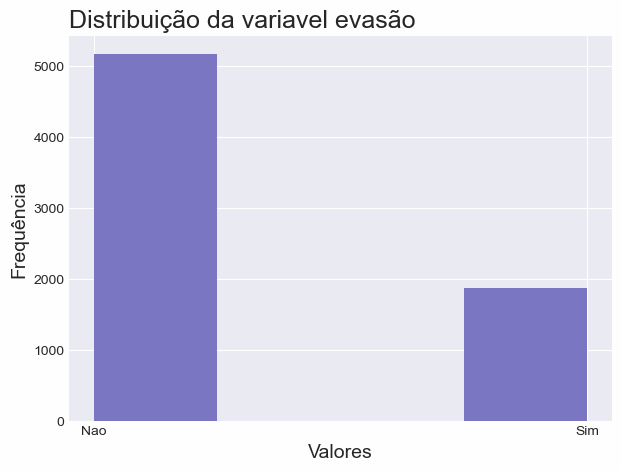

In [10]:
plotar(dados['Evasao'], 'Distribuição da variavel evasão')

In [11]:
# Para usar essa funcao precisa sempre passar um groupby contendo Evasão mais alguma coluna a ser analisada e uma coluna count
def plot_evasao(data, label_x, label_y, titulo):
    
    # Criar gráfico de barras lado a lado
    fig, ax = plt.subplots()
    bar_width = 0.35
    opacity = 0.8
    colors = ['#008fd5', '#fc4f30']

    # Barras para 'Sim' e 'Nao'
    bar1 = ax.bar(data[data['Evasao'] == 'Sim'].index, 
                  data[data['Evasao'] == 'Sim']['count'],
                  bar_width,
                  alpha=opacity,
                  color=colors[0],
                  label='Sim')

    bar2 = ax.bar(data[data['Evasao'] == 'Nao'].index, 
                  data[data['Evasao'] == 'Nao']['count'],
                  bar_width,
                  alpha=opacity,
                  color=colors[1],
                  label='Nao')

    # Personalizar o gráfico
    ax.set_xlabel(label_x, fontsize=14)
    ax.set_ylabel(label_y, fontsize=14)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xticks(data.index + bar_width/2)
    ax.set_xticklabels(data[data.columns[1]])
    ax.legend()
    
    # rotaciona as labels do eixo x para evitar sobreposição
    plt.xticks(rotation=90)

    # Exibir o gráfico
    plt.show()


In [12]:
# Converter coluna Genero em tipo categórico
dados['Genero'] = pd.Categorical(dados['Genero'])

# Agrupar dados por Evasao e Genero
grouped = dados.groupby(['Evasao', 'Genero']).size().reset_index(name='count')

grouped.head()

,Evasao,Genero,count
0,Nao,Feminino,2549
1,Nao,Masculino,2625
2,Sim,Feminino,939
3,Sim,Masculino,930


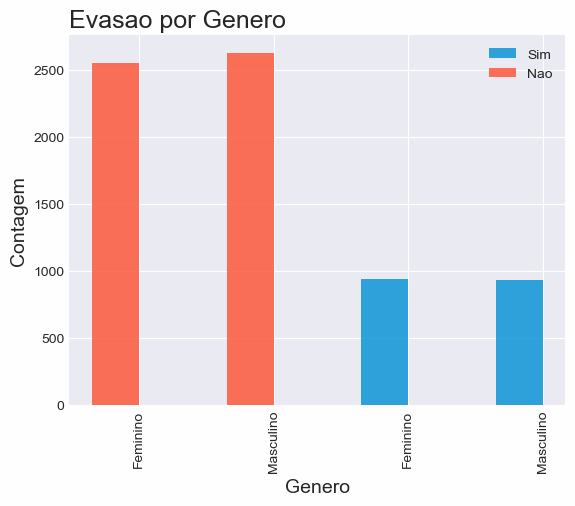

In [13]:
plot_evasao(grouped, 'Genero', 'Contagem', 'Evasao por Genero')

Podemos identificar que a variável "Genero" não possui impacto na taxa de evasão, uma vez que a proporção de pessoas que cancelaram o serviço entre os genêros é a mesma.

In [14]:
# Agrupar dados por taxa de evasão e Provedor de internet
grouped_provedor = dados.groupby(['Evasao', 'Provedor_Internet']).size().reset_index(name='count')

In [15]:
grouped_provedor.head()

,Evasao,Provedor_Internet,count
0,Nao,DSL,1962
1,Nao,Fibra optica,1799
2,Nao,Nao,1413
3,Sim,DSL,459
4,Sim,Fibra optica,1297


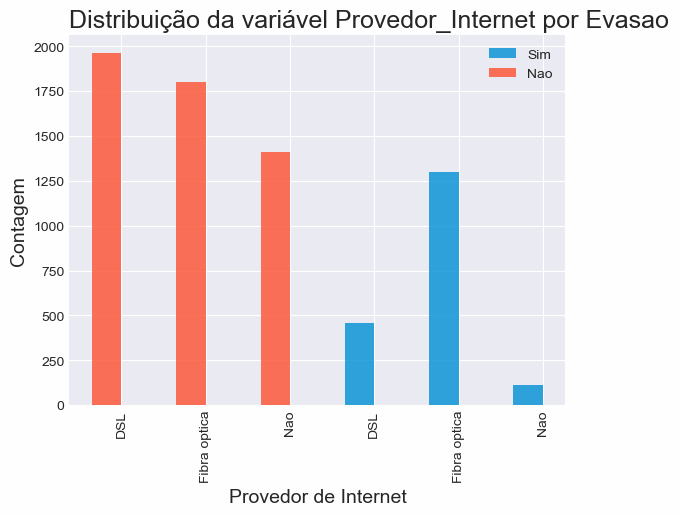

In [16]:
plot_evasao(grouped_provedor, 'Provedor de Internet', 'Contagem', 'Distribuição da variável Provedor_Internet por Evasao')

É possivel perceber que o numero de clientes que usam fibra optica possuem uma taxa de evasão consideravelmente alta.

In [17]:
# Plotando o gráfico referente a se o cliente possui segurança online ou não
# Agrupar dados por taxa de evasão e Provedor de internet
grouped_seguranca = dados.groupby(['Evasao', 'Seguranca_Online']).size().reset_index(name='count')

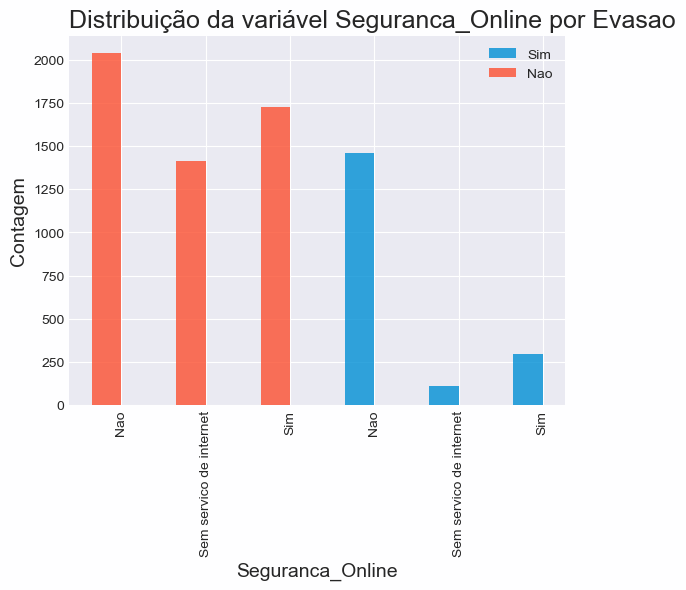

In [18]:
plot_evasao(grouped_seguranca, 'Seguranca_Online', 'Contagem', 'Distribuição da variável Seguranca_Online por Evasao')

Podemos perceber que quem não tem plano de segurança online tem uma taxa de evasão consideravelmente maior que o resto

In [19]:
# Plotando o gráfico referente a se o cliente possui ou não um backup online
# Agrupar dados por taxa de evasão e Backup_Online
grouped_backup = dados.groupby(['Evasao', 'Backup_Online']).size().reset_index(name='count')

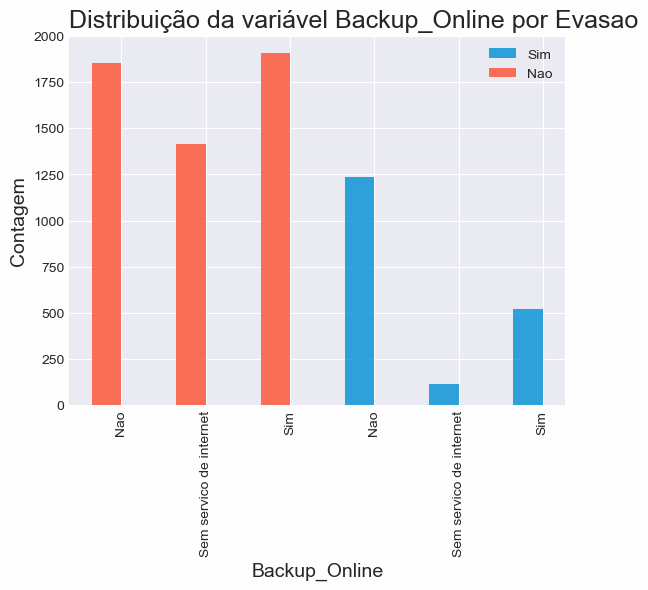

In [20]:
plot_evasao(grouped_backup, 'Backup_Online', 'Contagem', 'Distribuição da variável Backup_Online por Evasao')

Podemos perceber que quem não possui backup online tambem tende a ter uma taxa de evasão maior.

In [21]:
# Plotando o gráfico referente a se o cliente possui ou não suporte tecnico
# Agrupar dados por taxa de evasão e Suporte_Tecnico 
grouped_suporte_tecnico = dados.groupby(['Evasao', 'Suporte_Tecnico']).size().reset_index(name='count')

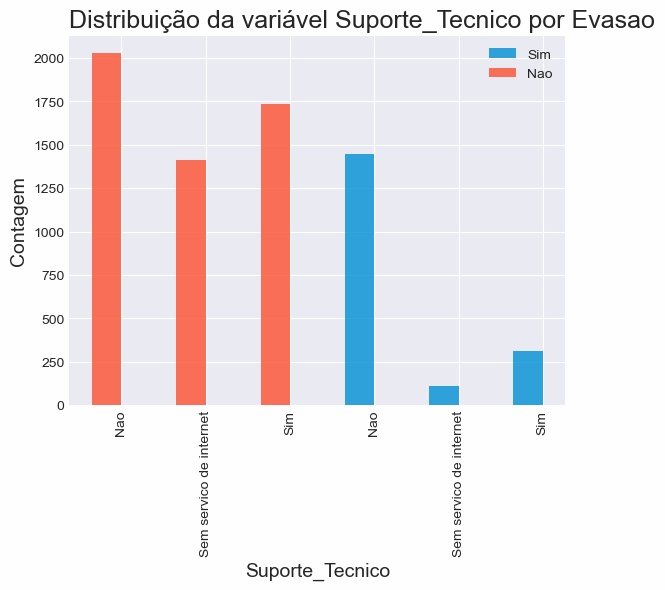

In [22]:
plot_evasao(grouped_suporte_tecnico, 'Suporte_Tecnico', 'Contagem', 'Distribuição da variável Suporte_Tecnico por Evasao')

Mesma coisa acontece aqui. quem não tem suporter tecnico tambem tende a ter uma taxa de evasão maior.

In [23]:
# Plotando o gráfico referente a se o cliente possui ou não suporte tecnico
# Agrupar dados por taxa de evasão e Protecao_de_Dispositivo
grouped_protecao = dados.groupby(['Evasao', 'Protecao_de_Dispositivo']).size().reset_index(name='count')

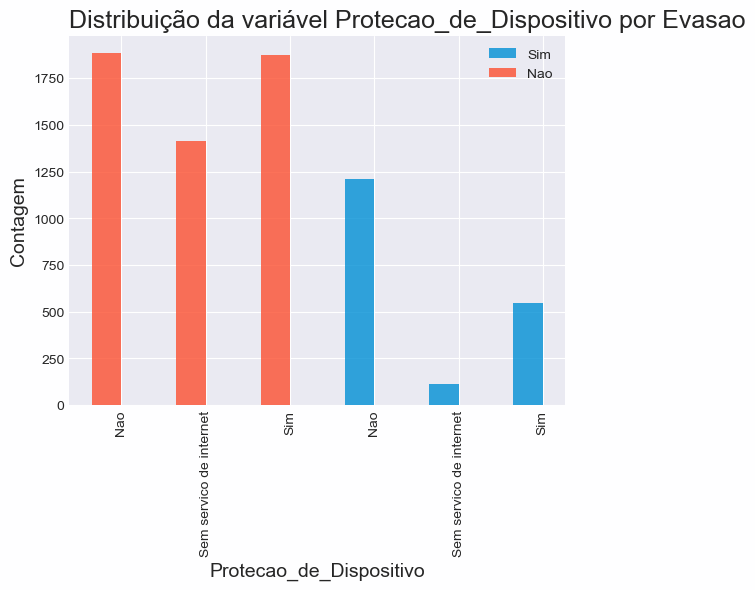

In [24]:
plot_evasao(grouped_protecao, 'Protecao_de_Dispositivo', 'Contagem', 'Distribuição da variável Protecao_de_Dispositivo por Evasao')

Tambem acontece aqui. quem não tem proteção de dispositivos tende a ter uma taxa de evasão maior.

In [25]:
# Plotando o gráfico referente ao prazo do contrato do cliente
# Agrupar dados por taxa de evasão e Contrato
grouped_contrato = dados.groupby(['Evasao', 'Contrato']).size().reset_index(name='count')

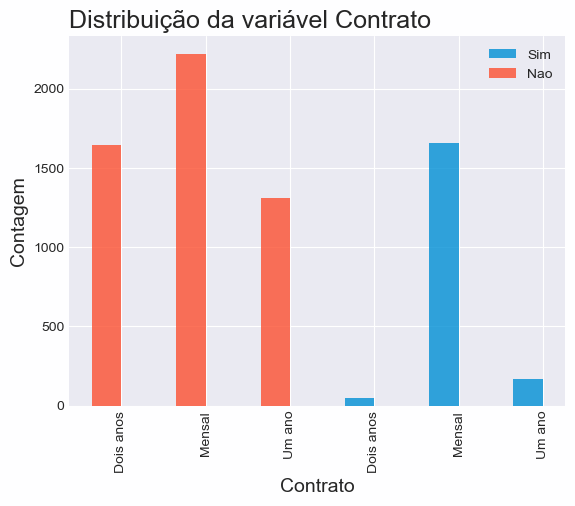

In [26]:
plot_evasao(grouped_contrato, 'Contrato', 'Contagem', 'Distribuição da variável Contrato')

Podemos observar que quem tem contrato do tipo mensal tem uma taxa muito maior que o resto

In [57]:
# Agrupar dados por taxa de evasão e Idoso
grouped_idoso = dados.groupby(['Evasao', 'Idoso']).size().reset_index(name='count')

In [59]:
grouped_idoso.head()

,Evasao,Idoso,count
0,Nao,0,4508
1,Nao,1,666
2,Sim,0,1393
3,Sim,1,476


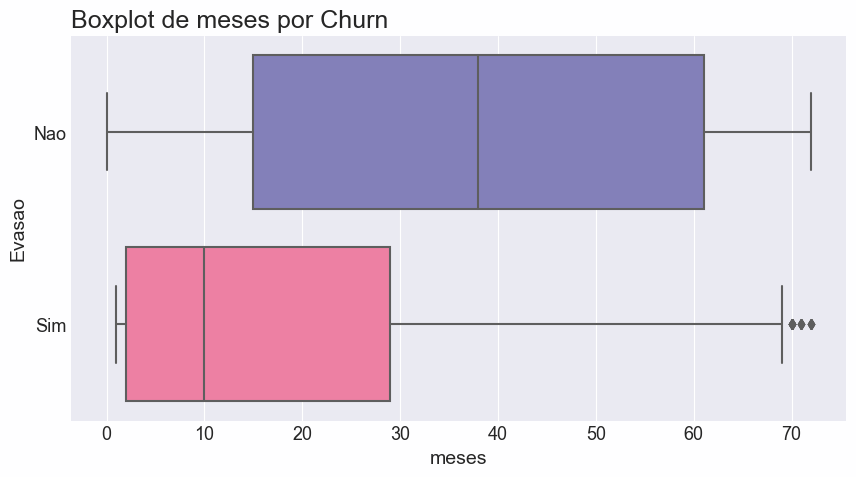

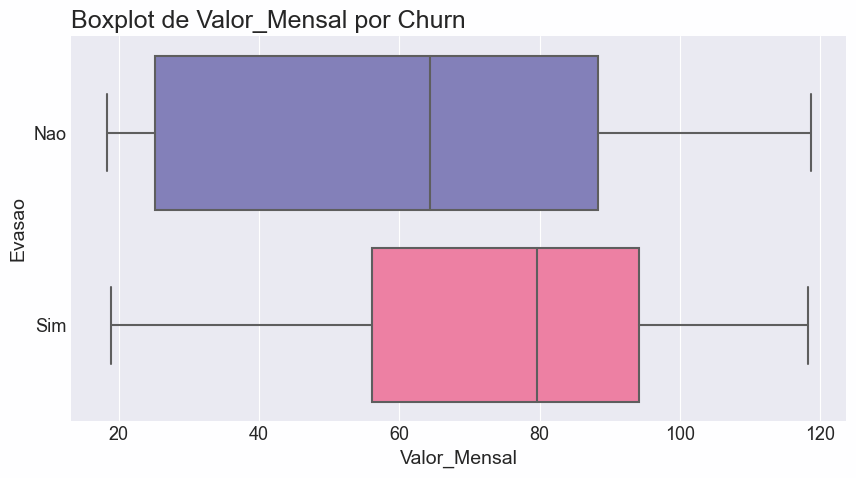

In [27]:
# Box Plot das features numéricas.

for col in ['meses', 'Valor_Mensal']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y='Evasao', data=dados)
    plt.title(f"Boxplot de {col} por Churn", fontsize=18, loc='left')
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Evasao', fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

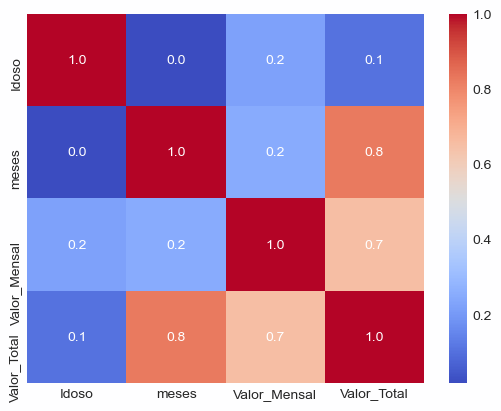

In [63]:
# Selecionar as variáveis para o heatmap
data_heat = dados[["Idoso", "meses", "Valor_Mensal", "Valor_Total"]].corr()

# Criar o heatmap
ax = sns.heatmap(data_heat,cmap="coolwarm")

# Exibir os valores no meio dos quadrados
for i in range(data_heat.shape[0]):
    for j in range(data_heat.shape[1]):
        ax.text(j+0.5, i+0.5, '{:.1f}'.format(data_heat.iloc[i,j]),
                ha='center', va='center', color='white', fontsize=10)

# Exibir o heatmap
plt.show()

In [32]:
dados[['Valor_Mensal', 'Valor_Total']].corr()

,Valor_Mensal,Valor_Total
Valor_Mensal,1.000000,0.651182
Valor_Total,0.651182,1.000000
